**Autoencoder Implementation Using Feed Forward Neural Network**  
- We will implement unsupervised learning here

# **Importing Libraries**

In [41]:
# Sequential API to create models
from keras.models import Sequential

#Components to create a model
from keras.layers import Dense, Input

# Stochastic Gradient Descent Algorithm
from keras.optimizers import SGD, Adadelta, Adam

# Keras already hosted MNIST dataset for us
from keras.datasets import mnist

# An Keras utility to visualize model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of it's utilities
from skimage.io import imshow

# Another python library for plotting things
import matplotlib.pyplot as plt

# Another python library to manipulate vectors, matrices, arrays etc.
import numpy as np

# **Hyperparameters**

In [42]:
# Whole dataset splits into batches
batch_size = 128

# Number of times we want to train the model
num_epoch = 100

# **Load Data**

In [43]:
# Load MNISR dataset
# Data split into two sub-set: Training and Testing, No need for labels
(X_train, _), (X_test, _) = mnist.load_data() #Data will split according to the default settings

'_' is a variable that stores the label. But we will not use it.  
If we give the command -
```
print("Number of Associated Labels:", len(_))
```
It will show -
```
Number of Associated Labels: 10000
```





# **Data Statistics**

In [44]:
print("Number of Training Samples:", len(X_train))

Number of Training Samples: 60000


In [45]:
print("Shape of Training Data:",X_train.shape)

Shape of Training Data: (60000, 28, 28)


(Samples, m,n)  
28*28 is the dimension of each sample image.


In [46]:
print("Data Type of Training Samples:",X_train.dtype)

Data Type of Training Samples: uint8


unsigned integer type data

In [47]:
print("Number of Testing Samples:", len(X_test))

Number of Testing Samples: 10000


In [48]:
print("Shape of Test Data:",X_test.shape)

Shape of Test Data: (10000, 28, 28)


In [49]:
print("Data Type of Test Data:",X_test.dtype)

Data Type of Test Data: uint8


# **Visualize Data**

In [50]:
# A single sample among 60,000 samples
X_train[99].shape

(28, 28)

In [51]:
a_random_sample = X_train[420]
# Pixel values of the sample
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,
         66, 138, 255, 253, 253, 253, 201, 127,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 228,
        252, 252, 228, 236, 252, 252, 252, 230,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 161, 252,
        252, 136,  32,  44,  69,  69,  69,  63,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 194, 252,
        134,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 181, 252, 189,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 253, 137,
         24,  24,  24,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 252, 252,
        252, 252, 253, 236,  78,   9,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  53, 253, 252, 233,
        183, 215, 222, 252, 252,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 161,  87,  33,
          0,  21,  25, 135, 252, 160,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  99, 252, 202,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   3, 170, 253,  98,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  24, 252, 252,  45,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 108, 252, 233,  33,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  43, 233, 252, 141,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 220, 253, 210,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,
        160, 253, 179,  42,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30, 155,
        252, 231,  42,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  49, 228, 252,
        227,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

/tmp/ipython-input-52-1069867820.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(a_random_sample)


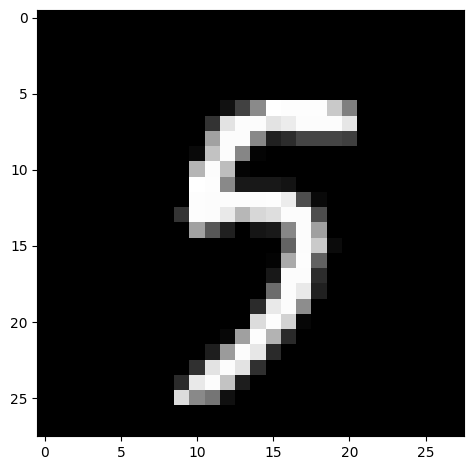

In [52]:
# Displaying it
imshow(a_random_sample)

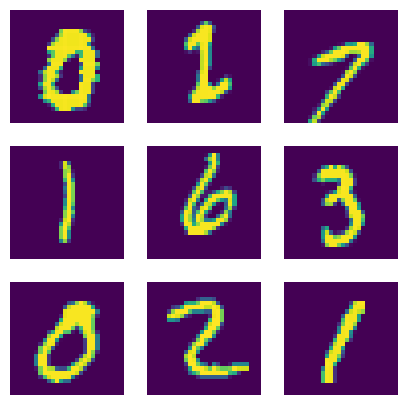

In [53]:
# Plotting 9 image from the dataset
# Define the size of the figure
plt.figure(figsize=(5, 5))

for i in range(9): # i starts from 0 and ends at 8
  ax = plt.subplot(3, 3, i + 1)

  #Get a sample at index i
  an_image = X_train[i+69]

  #Display the image
  plt.imshow(an_image)

  #Display the label of the sample as title
  #plt.title(int(y_train[i+13])) We don't have the label

  plt.axis("off")

One neuron takes only one value. Cannot take matrix as input.  
So, every neuron will take a pixel value from the image grid of ```28*28 ```  
So, number of neuron required is = 28*28 = 784 at the input layer.  
We need the convert the image into 1D values for giving input to the model.

# **Reshape and Flatten Data**

**For feed forward neural network we need to flatten the data**

In [54]:
print("Shape of Training Data:",X_train.shape)
print("Shape of Training Sample:",X_train[0].shape)

Shape of Training Data: (60000, 28, 28)
Shape of Training Sample: (28, 28)


In [55]:
#Get a sample image
an_image = X_train[0]

print("Shape of the sample image:",an_image.shape)

# Define new shape and flatten the image
new_shape = 28*28
flattened_image = an_image.reshape(new_shape)

print("Shape of the flattened image:",flattened_image.shape)

Shape of the sample image: (28, 28)
Shape of the flattened image: (784,)


1D vector with 784 values

In [56]:
# Flatten the whole training data

print("Previous shape of X_train:",X_train.shape)

X_train = X_train.reshape(60000,784) #(number_images, to_the_size_we_want)

print("New shape of X_train:",X_train.shape)

Previous shape of X_train: (60000, 28, 28)
New shape of X_train: (60000, 784)


In [57]:
# Flatten the test data
print("Previous shape of X_test:",X_test.shape)

X_test = X_test.reshape(10000, 784)

print("New shape of X_test:",X_test.shape)

Previous shape of X_test: (10000, 28, 28)
New shape of X_test: (10000, 784)


In [58]:
print("Previous DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

# Change data type of train and test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("New DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

Previous DataType of Train and Test samples:
uint8
uint8
New DataType of Train and Test samples:
float32
float32


# **Rescaling Data**

Scaling the pixel values to the range (0,1)

In [59]:
# Get a random sample
a_sample = X_train[0]

print("Min value of the sample:",a_sample.min())
print("Max value of the sample:",a_sample.max())

Min value of the sample: 0.0
Max value of the sample: 255.0


range 0-255

In [60]:
# Devide each value in train and test data by 255
X_train = X_train/255
X_test = X_test/255

In [61]:
# Get a random sample
a_sample = X_train[0]

print("Min value of the sample:",a_sample.min())
print("Max value of the sample:",a_sample.max())

Min value of the sample: 0.0
Max value of the sample: 1.0


# **Create Noisy Train Data**

/tmp/ipython-input-62-512973484.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(an_image) # to display the image we need to convert it back to 2D


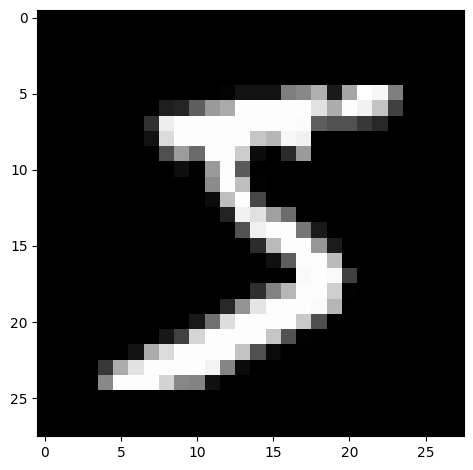

In [62]:
# Get a sample image from X_train
a_sample = X_train[0]

# Reshape it to 2D
an_image = a_sample.reshape(28,28) # as we turned every sample to 1D values

imshow(an_image) # to display the image we need to convert it back to 2D

/tmp/ipython-input-63-3247562595.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(random_array)


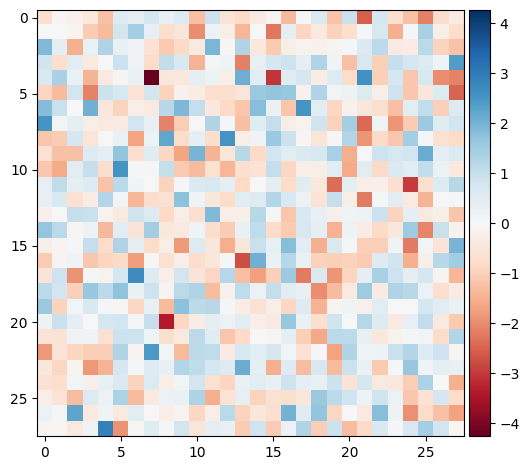

In [63]:
# create an array of random values that has the identical shape of the image we want to corrupt
random_array = np.random.normal(loc = 0.0, scale = 1.0, size = (28,28))

imshow(random_array)

np.random : creates a random array.  
random.normal : creates the array from a normal distribution  
loc = 0.0 : mean of the distribution is zero  
scale = 1.0 : standard deviation is one  
size = (28,28) : size of the array will be (28,28) - This size needs to be the same as the sample image size of the dataset

/tmp/ipython-input-64-1442067632.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(random_array)


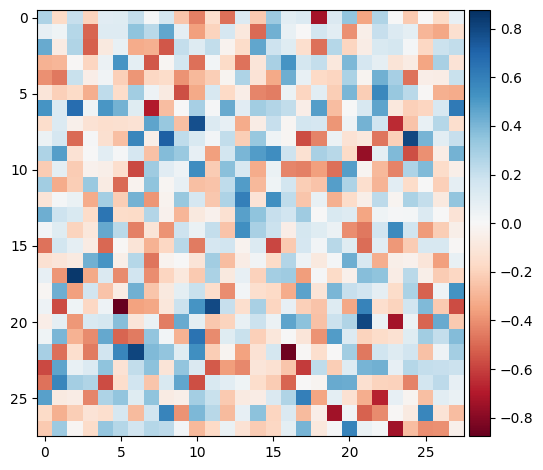

In [64]:
# Level of corruption
corruption_level = 0.3 # 30% corruption

# create an array of random values that has the identical shape of the image we want to corrupt
random_array = corruption_level * np.random.normal(loc = 0.0, scale = 1.0, size = (28,28))

imshow(random_array)

Due to certain properties of imshow() function we see a coloful image. But the image infact is in grayscale

/tmp/ipython-input-65-3129188957.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(corrupted_image)


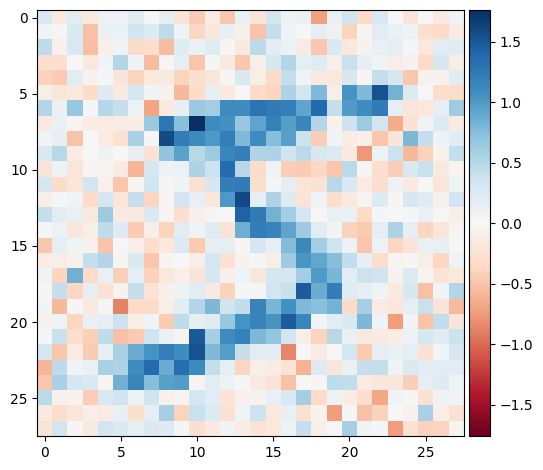

In [65]:
# Somewhat noisy image
corrupted_image = an_image + random_array

imshow(corrupted_image)

In [66]:
# Add random noise to train data
X_train_noisy = X_train + corruption_level * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)

# Add random noise to test data
X_test_noisy = X_test + corruption_level * np.random.normal(loc = 0.0, scale = 1.0, size = X_test.shape)

# **Clip Noisy Data**

In [67]:
# Min Value
X_train_noisy.min()

np.float64(-1.6945600051319332)

In [68]:
# Max Value
X_train_noisy.max()

np.float64(2.455293307466273)

The values are outside the range 0-1. But it's now not possible by rescaling. So, we will clip it

In [69]:
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

In [70]:
print("Min value of the sample:",X_train_noisy.min())
print("Max value of the sample:",X_train_noisy.max())

Min value of the sample: 0.0
Max value of the sample: 1.0


In [71]:
print(X_train_noisy.shape)
print(X_test_noisy.shape)

(60000, 784)
(10000, 784)


# **Define Model**

In [72]:
# Multilayer Perception model

#We want to create a sequentially stacked model using Keras Sequenctial API
model = Sequential()

# Set up input layer
model.add(Input(shape=(784,)))

# 1st layer in the model to receive inputs
model.add(Dense(784, activation='relu')) # size should be the same as the input

# Hidden layer
model.add(Dense(500, activation='relu')) #500 is taken arbitarily

# Output layer
model.add(Dense(784, activation='sigmoid')) # size same as input layer

We used sigmoid activation fuction here because the problem kind of a binary classification.  
If reconstruction is done properly then it's 1 and if not then it's 0.

# **Compile Model**

In [73]:
# Choose learning rate
learning_rate = 0.001

# Select optimizer
optimizer = Adam(learning_rate=learning_rate)

# Select loss function
loss = "binary_crossentropy"

# Select evaluation metrics
metrics = ["accuracy"]

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# **Visualize Model**

In [74]:
# A summary of inputs, outputs in each layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       392,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,400,724 (5.34 MB)

 Trainable params: 1,400,724 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

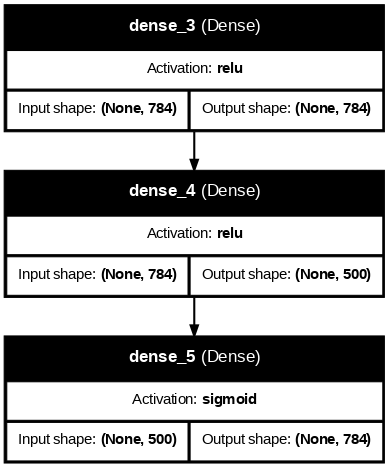

In [75]:
plot_model(model,dpi=75,show_shapes=True,show_layer_names=True,show_layer_activations=True)

# **Model Train**

In [76]:
# Train
history = model.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=num_epoch)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.0104 - loss: 0.2035
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.0141 - loss: 0.0958
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.0138 - loss: 0.0892
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.0157 - loss: 0.0861
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.0148 - loss: 0.0846
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.0161 - loss: 0.0833
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.0145 - loss: 0.0827
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.0152 - loss: 0.0820
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.0152 - loss: 0.0812
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.0152 - loss: 0.0809
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.0155 - loss: 0.0806
Epoch 12/100
469/46

# **Inference on Test Data**

In [77]:
# Evaluate
evaluation = model.evaluate(X_test_noisy, X_test)

# Display test statistics
print("Summary: Loss over the test dataset: %.2f, Accuracy: %.2f" % (evaluation[0]*100, evaluation[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0179 - loss: 0.0853
Summary: Loss over the test dataset: 8.56, Accuracy: 1.59


# **Prediction**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


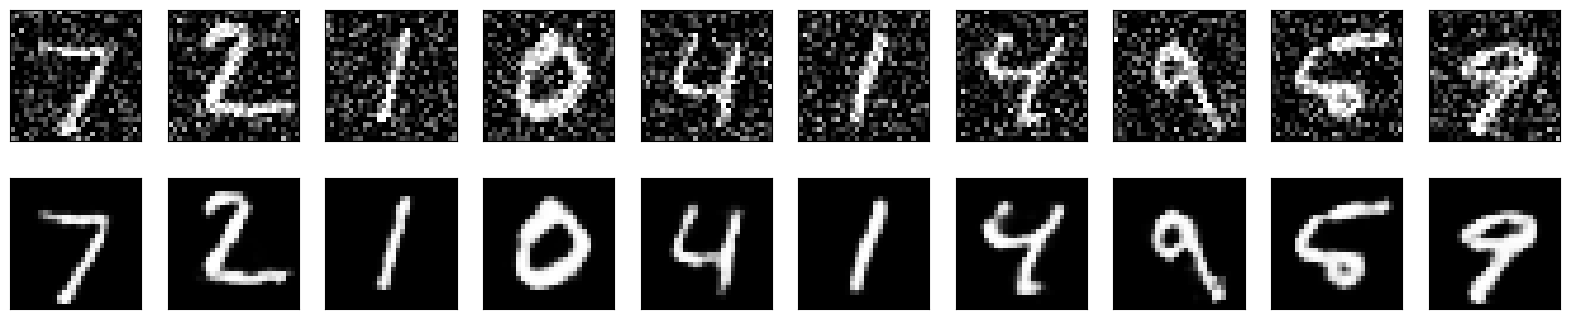

In [78]:
# Decode test image
recostructed_images = model.predict(X_test_noisy)

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recostructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()